In [4]:
setwd('/data/users/jiancheng.zhai/project/advertiser_cluster/bin')
getwd()

[1] "/data/users/jiancheng.zhai/project/advertiser_cluster/bin"

In [3]:
rm(list=ls())
library(Matrix)
library(parallel)
library(skmeans)
library(slam)
library(cluster)
library(pvclust)
library(mclust)
library(flexclust)
options(scipen=200) 
options(jupyter.plot_mimetypes = 'image/png')



Attaching package: ‘Matrix’

The following objects are masked from ‘package:base’:

    crossprod, tcrossprod

Package 'mclust' version 5.1
Type 'citation("mclust")' for citing this R package in publications.
Loading required package: grid
Loading required package: lattice
Warning message:
: package ‘lattice’ was built under R version 3.2.0Loading required package: modeltools
Loading required package: stats4


In [5]:
read.file.func <- function(file.path){                                                                                                  
     d <- read.csv(file=file.path,                                                                                                       
                   header=F,                                                                                                             
                   stringsAsFactors=F,                                                                                                   
                   sep='\t')                                                                                                             
                                                                                                                                         
     return(d)                                                                                                                           
}                                     

In [6]:
res.file <- "../data/finance/mm"
res.data <- read.file.func(res.file)

row.names(res.data) <- res.data$V1
res.data$V1 <- NULL
s.res.data <- Matrix(as.matrix(res.data), sparse=T)


In [5]:
#head(s.res.data, n=1)
head(s.res.data[,1], n=20)

4723      6101      6883      7207      7412      7604      7710      7981 
1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 0.2866227 0.8892060 0.3442876 
     7987      8117      8194      8283      8492      8724      8770      9101 
0.9824939 0.0000000 1.0000000 1.0000000 0.0000000 1.0000000 1.0000000 1.0000000 
     9149      9195      9207      9295 
1.0000000 1.0000000 1.0000000 1.0000000

In [120]:
stat.res.func <- function(data.set, clust) {


     ids <- rownames(data.set)

     cls <- as.data.frame(clust$cluster)
     clust.data <- as.data.frame(cbind(ids, cls))

     colnames(clust.data) <- c("ad_id", "cluster")
     detail.file <- "../data/finance/detail"
     detail.data <- read.file.func(detail.file)
     colnames(detail.data) <- c("name", "class", "raw_data", "ad_id", "company_id")

     merge.data <- merge(clust.data, detail.data, by="ad_id", all.x=T, all.y=F)
     raw.file <- "../data/finance/week_data"
     raw.data <- read.file.func(raw.file)
     colnames(raw.data) <- c("ad_id", "device_type", "url", "py_id", "geo_id", "count")
     stat.uv <- tapply(raw.data$py_id, raw.data$ad_id, FUN = function(x) length(unique(x)))
     stat.uv.data <- as.data.frame(stat.uv)
     colnames(stat.uv.data) <- c("uv")
     stat.uv.data$ad_id <- row.names(stat.uv.data)
     merge.data <- merge(merge.data, stat.uv.data, by="ad_id", all.x=T, all.y=F)
     return(merge.data[order(merge.data$cluster), ])
}

In [7]:
   # clust <- skmeans(s.res.data, 3, control=list(verbose=T))

Initial solutions created (length: 6)
Selecting new population: 1,2,3,4,5,6
Iteration: 1 *** value[7]: 30.1663 pre-optimized
Iteration: 1 *** value[7]: 14.4557
Iteration: 1 *** value[8]: 29.6139 pre-optimized
Iteration: 1 *** value[8]: 11.1105
Iteration: 1 *** value[9]: 29.9491 pre-optimized
Iteration: 1 *** value[9]: 14.3899
Iteration: 1 *** value[10]: 22.5575 pre-optimized
Iteration: 1 *** value[10]: 14.4085
Iteration: 1 *** value[11]: 16.4852 pre-optimized
Iteration: 1 *** value[11]: 11.1105
Iteration: 1 *** value[12]: 20.4526 pre-optimized
Iteration: 1 *** value[12]: 14.4074
Selecting new population: 4,7,8,9,10,11
Iteration: 2 *** value[7]: 25.0412 pre-optimized
Iteration: 2 *** value[7]: 14.3967
Iteration: 2 *** value[8]: 18.4878 pre-optimized
Iteration: 2 *** value[8]: 14.4557
Iteration: 2 *** value[9]: 17.2885 pre-optimized
Iteration: 2 *** value[9]: 11.1105
Iteration: 2 *** value[10]: 21.7791 pre-optimized
Iteration: 2 *** value[10]: 14.394
Iteration: 2 *** value[11]: 17.0688 p

In [92]:
get.avr.sli.func <- function(data.set){

     res.list <- lapply(seq(2,10),
            function(k){
                clust <- skmeans(data.set, k, 66666)
                avr <- sum(silhouette(clust)[,3])/nrow(silhouette(clust))
                return(avr)
            })
     return(do.call(rbind, res.list))
}

In [49]:
#nrow(silhouette(clust))
avr <- get.avr.sli.func(s.res.data, 3)

Initial solutions created (length: 6)
Selecting new population: 1,2,3,4,5,6
Iteration: 1 *** value[7]: 29.2836 pre-optimized
Iteration: 1 *** value[7]: 14.5565
Iteration: 1 *** value[8]: 20.0119 pre-optimized
Iteration: 1 *** value[8]: 14.673
Iteration: 1 *** value[9]: 22.2344 pre-optimized
Iteration: 1 *** value[9]: 14.6887
Iteration: 1 *** value[10]: 20.1504 pre-optimized
Iteration: 1 *** value[10]: 14.3938
Iteration: 1 *** value[11]: 26.1443 pre-optimized
Iteration: 1 *** value[11]: 11.1105
Iteration: 1 *** value[12]: 18.0525 pre-optimized
Iteration: 1 *** value[12]: 11.1105
Selecting new population: 7,8,9,10,11,12
Iteration: 2 *** value[7]: 19.8751 pre-optimized
Iteration: 2 *** value[7]: 14.5521
Iteration: 2 *** value[8]: 18.5552 pre-optimized
Iteration: 2 *** value[8]: 14.5861
Iteration: 2 *** value[9]: 18.3722 pre-optimized
Iteration: 2 *** value[9]: 14.6138
Iteration: 2 *** value[10]: 17.878 pre-optimized
Iteration: 2 *** value[10]: 14.3938
Iteration: 2 *** value[11]: 18.9729 p

In [50]:
avr

[1] 0.7830013

,ad_id,cluster,name,class,raw_data,company_id,uv
41,11957,1,恒丰银行,银行,金融类/银行,5173,794
44,12006,1,嘉业投资,其他金融类,金融类/其他金融类,5212,1071
61,12233,1,华泰证券开户,证券,金融类/证券,5356,1084
78,12432,1,宁波甬商世纪投资管理有限公司上海分公司,原油,金融类/期货/原油,5489,965
86,12530,1,上海滏川投资管理有限公司,其他金融类,金融类/其他金融类,5561,2957
87,12535,1,胡泽水,其他金融类,金融类/其他金融类,5568,792
90,12572,1,华泰证券股份有限公司上海共和新路证券营业部,证券,金融类/证券,5593,869
91,12577,1,浦发银行,银行,金融类/银行,5595,3761
5,10224,2,深圳无界财富管理有限公司,P2P投资理财,金融类/P2P平台/P2P投资理财,3906,7955
13,10912,2,中国银联香港分公司,银行,金融类/银行,4429,2895


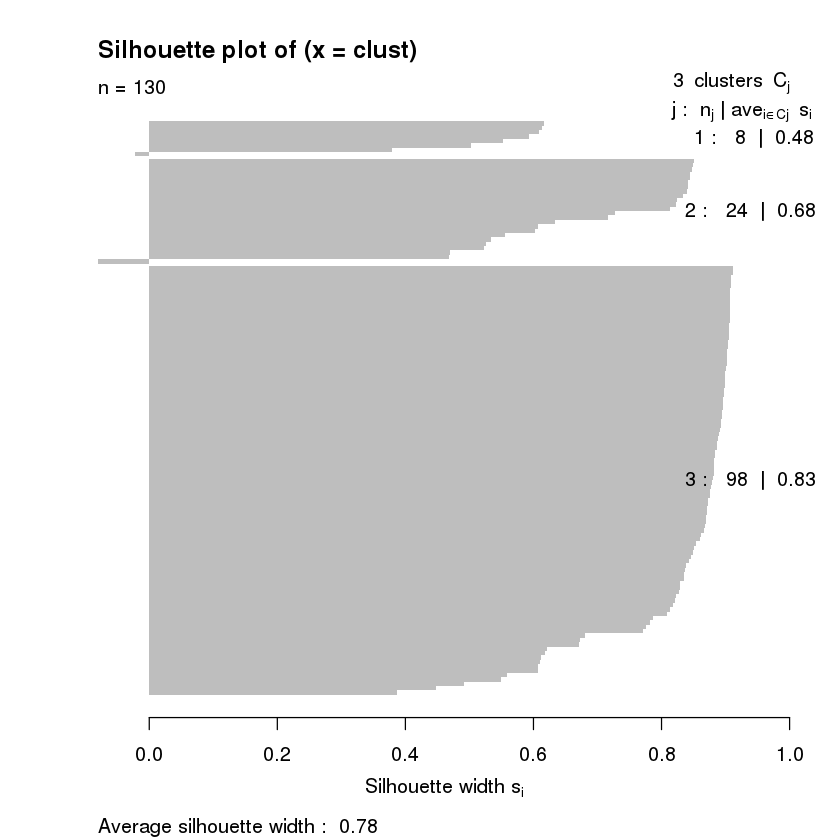

In [11]:
plot(silhouette(clust))

In [ ]:
#fit2 <- pvclust(t(res.data), method.hclust="ward",
#                 method.dist="euclidean")

The "ward" method has been renamed to "ward.D"; note new "ward.D2"


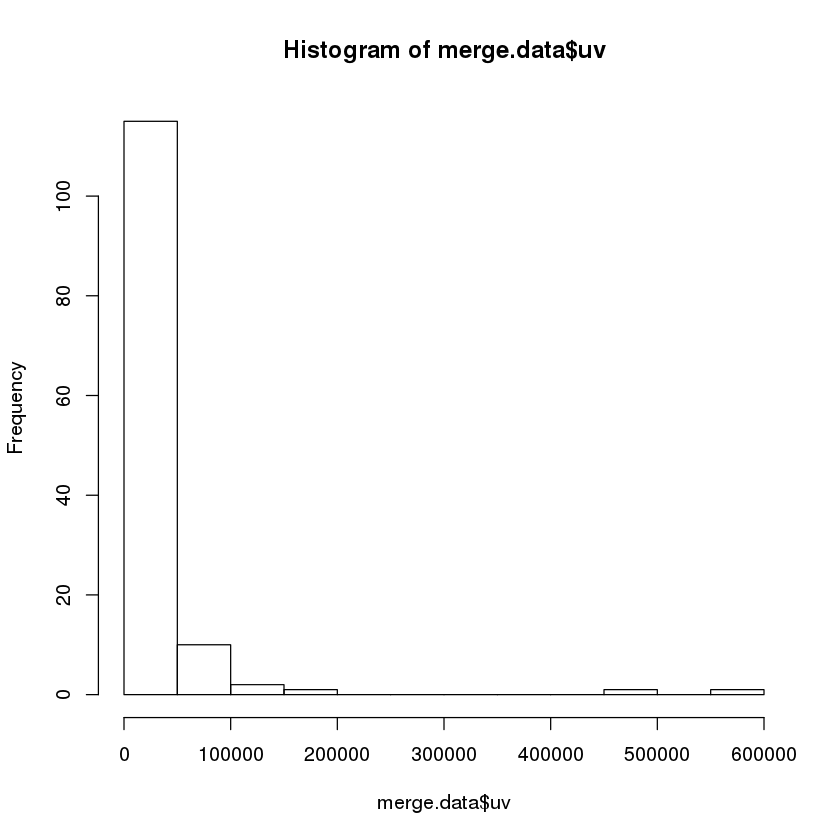

In [142]:
#hist(merge.data$uv)
#table(merge.data$uv)
hist(merge.data[merge.data$uv, ]$uv, breaks=seq(1, 10000, 100))
     #breaks=seq(1, max(merge.data$uv)+10000, 5000))
#nrow(merge.data[merge.data$uv<20000, ])
#nrow(merge.data[merge.data$uv>=20000, ])

#table(merge.data$uv)
#seq(1,10,0.1)



In [81]:
#data.set <- cbind(rownames(s.res.data), s.res.data)
#head(rownames(s.res.data))

#head(colnames(data.set))
#class(merge.data[merge.data$uv<7000, ]$ad_id)
#B.set <- merge.data[merge.data$uv>=7000, ]$id

res.file <- "../data/finance/mm"
res.data <- read.file.func(res.file)


In [123]:
A.set <- res.data[which(res.data[, "V1"] %in% merge.data[merge.data$uv<7000, ]$ad_id), ]

B.set <- res.data[which(res.data[, "V1"] %in% merge.data[merge.data$uv>=7000, ]$ad_id), ]


In [124]:
row.names(A.set) <- A.set$V1
row.names(B.set) <- B.set$V1
A.set$V1 <- NULL
B.set$V1 <- NULL
s.A.set <- Matrix(as.matrix(A.set), sparse=T)
s.B.set <- Matrix(as.matrix(B.set), sparse=T)



In [93]:
a.d <- get.avr.sli.func(s.A.set)
b.d <- get.avr.sli.func(s.B.set)

Initial solutions created (length: 6)
Selecting new population: 1,2,3,4,5,6
Iteration: 1 *** value[7]: 16.1703 pre-optimized
Iteration: 1 *** value[7]: 11.1514
Iteration: 1 *** value[8]: 19.0815 pre-optimized
Iteration: 1 *** value[8]: 11.1514
Iteration: 1 *** value[9]: 15.9579 pre-optimized
Iteration: 1 *** value[9]: 11.1514
Iteration: 1 *** value[10]: 17.118 pre-optimized
Iteration: 1 *** value[10]: 11.1514
Iteration: 1 *** value[11]: 15.1721 pre-optimized
Iteration: 1 *** value[11]: 11.1514
Iteration: 1 *** value[12]: 20.6667 pre-optimized
Iteration: 1 *** value[12]: 11.1514
Selecting new population: 7,8,9,10,11,12
Iteration: 2 *** value[7]: 15.4675 pre-optimized
Iteration: 2 *** value[7]: 11.1514
Iteration: 2 *** value[8]: 15.0644 pre-optimized
Iteration: 2 *** value[8]: 11.1514
Iteration: 2 *** value[9]: 15.9809 pre-optimized
Iteration: 2 *** value[9]: 11.1514
Iteration: 2 *** value[10]: 14.4442 pre-optimized
Iteration: 2 *** value[10]: 11.1514
Iteration: 2 *** value[11]: 14.9492 

0.711932
0.765623
0.7247095
0.683554
0.5811754
0.3906914
0.4960717
0.478809
0.4961585


0.8284442
0.5555743
0.527612
0.4907821
Inf
Inf
Inf
Inf
Inf


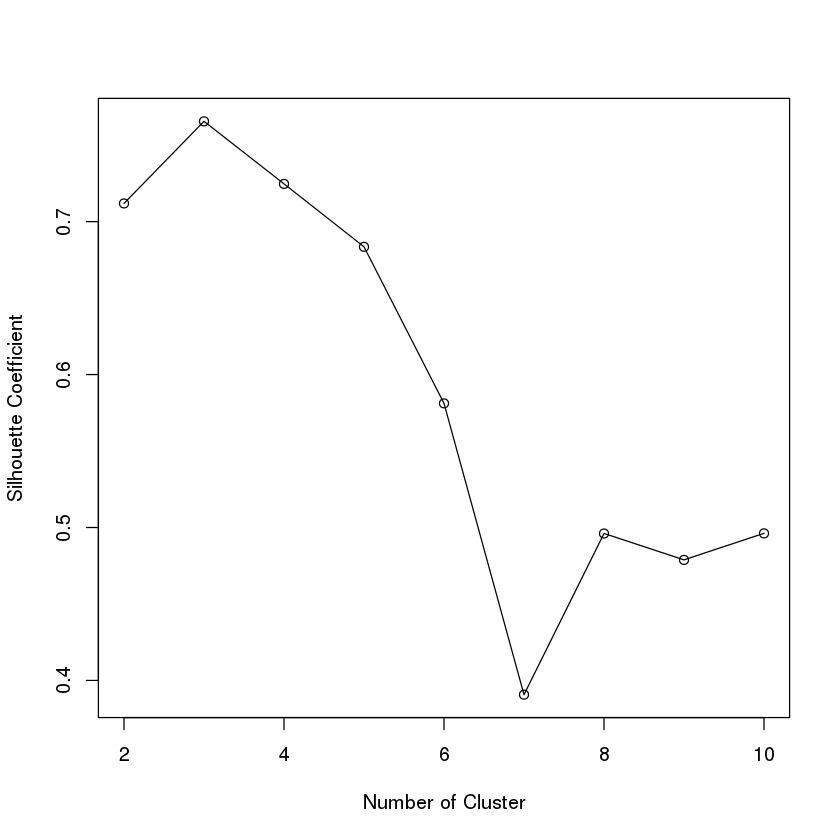

In [137]:
a.d
b.d
plot(seq(2,10), a.d, type="o", xlab="Number of Cluster", ylab="Silhouette Coefficient")
#plot(seq(2,5), b.d[1:4], type="o", xlab="Number of Cluster", ylab="Silhouette Coefficient")
#dim(s.res.data)

In [141]:
#clust <- skmeans(s.B.set, 2, control=list(verbose=T))
#plot(silhouette(clust))
clust



A hard spherical k-means partition of 52 objects into 2 classes.
Class sizes: 11, 41
Call: skmeans(x = s.B.set, k = 2, control = list(verbose = T))

In [128]:
b.res <- stat.res.func(B.set, clust)
#head(rownames(B.set))
#head(B.set[,1])

In [130]:
b.res

,ad_id,cluster,name,class,raw_data,company_id,uv
1,10099,1,方元在线金融服务（深圳）股份有限公司,P2P平台,金融类/P2P平台,3820,11727
2,10207,1,北京仁远信诚财富投资管理有限公司,P2P投资理财,金融类/P2P平台/P2P投资理财,3895,19891
3,10220,1,卡卡贷,其他金融类,金融类/其他金融类,3903,34885
5,10402,1,开鑫贷,P2P平台,金融类/P2P平台,4038,20519
6,10744,1,建设银行,银行,金融类/银行,4290,15981
7,10855,1,搜藏（北京）网络科技有限公司,其他金融类,金融类/其他金融类,4361,13606
9,11403,1,上海欣亨金融信息服务有限公司,P2P投资理财,金融类/P2P平台/P2P投资理财,4828,10627
11,11489,1,北京银泰银信投资管理有限公司,P2P平台,金融类/P2P平台,4883,34164
12,11751,1,益盟,股票基金,金融类/证券/股票基金,5030,44970
13,11792,1,宋财（杭州）互联网金融服务有限公司,P2P投资理财,金融类/P2P平台/P2P投资理财,5060,61932


In [132]:
a.res <- stat.res.func(A.set, clust)

In [140]:
rownames(a.res)<- NULL
a.res

,ad_id,cluster,name,class,raw_data,company_id,uv
1,10912,1,中国银联香港分公司,银行,金融类/银行,4429,2895
2,11078,1,江西省博汇九洲金融服务有限公司,P2P投资理财,金融类/P2P平台/P2P投资理财,4554,3911
3,11264,1,银河证券,证券,金融类/证券,4729,3498
4,11975,1,华泰证券,证券公司,金融类/证券/证券公司,5182,295
5,12224,1,深圳前海元满堂红资产管理有限公司,金融类,金融类,5354,1705
6,12376,1,厦门银行股份有限公司,银行,金融类/银行,5461,1247
7,12404,1,青岛易添财富商贸有限公司上海分公司,原油,金融类/期货/原油,5475,409
8,12464,1,浙江银狐网络科技有限公司,P2P平台,金融类/P2P平台,5425,2723
9,12568,1,广州市万隆证券咨询顾问有限公司,证券,金融类/证券,5592,2829
10,12626,1,广东汇天下投资管理有限公司,其他金融类,金融类/其他金融类,5625,5157
